<a href="https://colab.research.google.com/github/Zakibrahmi/AgentAI/blob/main/CrewAI_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **CrewAI**
CrewAI is a cutting-edge framework for orchestrating autonomous AI agents.

In this tutorial we will create a Multi-Agent system to research and write article. The SMA is composed of three agents:
1. Planner Agent
2. Writer Agent
3. Editor Agent


Libraries to be installed: crewai , crewai_tools and lanchain

In [1]:
!pip install crewai==0.28.8 crewai_tools==0.1.6 langchain_community==0.0.29

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 719.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of embedchain to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of embedchain to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of embedchain[github,youtube] to determine which version is compatible with other requirements. This could take a while

In [1]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

Import from the crewAI libray

In [2]:
from crewai import Agent, Task, Crew

OpenAI's gpt-3.5-turbo LLM is used by agents.
of course you can use others  LLM models such as  

In [ ]:
import os
from utils import get_openai_api_key

openai_api_key = get_openai_api_key()
os.environ["OPENAI_MODEL_NAME"] = 'gpt-3.5-turbo'

# **Creating Agents**

Define your Agents, and provide them a **role**, **goal** and **backstory**.
It has been seen that LLMs perform better when they are role playing.

**Agent: Planner**

 *Pro Tip:* When writing text in Python, there's a cool trick you can use to keep things clean and tidy!

Instead of using triple quotes like this:

    varname = """line 1 of text
               line 2 of text
               """

You can use multiple strings side by side:

    varname = "line 1 of text"
            "line 2 of text"

This method avoids extra spaces and unnecessary newlines, making it super handy when you're formatting text for LLM prompts or other precise outputs. Keep your code clean and your text sharp!

In [4]:
planner = Agent(
    role="Content Planner",
    goal="Plan engaging and factually accurate content on {topic}",
    backstory="You're working on planning a blog article "
              "about the topic: {topic}."
              "You collect information that helps the "
              "audience learn something "
              "and make informed decisions. "
              "Your work is the basis for "
              "the Content Writer to write an article on this topic.",
    allow_delegation=False,
	verbose=True
)

ValidationError: 1 validation error for ChatOpenAI
__root__
  Did not find openai_api_key, please add an environment variable `OPENAI_API_KEY` which contains it, or pass `openai_api_key` as a named parameter. (type=value_error)

As you see in this code we use Agent method to create an agent.
An agent is defined by it role, goal and backstory.

1.   *Role & Goal:* Defines the agent's identity and mission, ensuring the LLM understands its purpose.
2.   *Backstory*: Provides context to improve the LLM's understanding of the task’s objectives.

Typically the **prompt** sent to the LLM is implicitly defined through the agent's role, goal, and backstory.


**Agent: Writer**


In [3]:
writer = Agent(
    role="Content Writer",
    goal="Write insightful and factually accurate "
         "opinion piece about the topic: {topic}",
    backstory="You're working on a writing "
              "a new opinion piece about the topic: {topic}. "
              "You base your writing on the work of "
              "the Content Planner, who provides an outline "
              "and relevant context about the topic. "
              "You follow the main objectives and "
              "direction of the outline, "
              "as provide by the Content Planner. "
              "You also provide objective and impartial insights "
              "and back them up with information "
              "provide by the Content Planner. "
              "You acknowledge in your opinion piece "
              "when your statements are opinions "
              "as opposed to objective statements.",
    allow_delegation=False,
    verbose=True
)

ValidationError: 1 validation error for ChatOpenAI
__root__
  Did not find openai_api_key, please add an environment variable `OPENAI_API_KEY` which contains it, or pass `openai_api_key` as a named parameter. (type=value_error)

**Agent: Editor**

In [ ]:
editor = Agent(
    role="Editor",
    goal="Edit a given blog post to align with "
         "the writing style of the organization. ",
    backstory="You are an editor who receives a blog post "
              "from the Content Writer. "
              "Your goal is to review the blog post "
              "to ensure that it follows journalistic best practices,"
              "provides balanced viewpoints "
              "when providing opinions or assertions, "
              "and also avoids major controversial topics "
              "or opinions when possible.",
    allow_delegation=False,
    verbose=True
)

#**Creating Tasks**
In the CrewAI framework, a task is a defined unit of work assigned to an agent. It represents a specific objective or action that the agent must accomplish.

*A task is an actionable objective — a clear instruction that tells the agent what to do. It's specific, goal-oriented, and part of the workflow.*
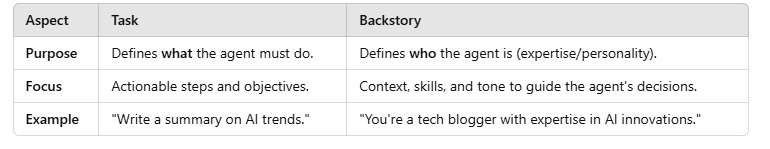

In [ ]:
plan = Task(
    description=(
        "1. Prioritize the latest trends, key players, "
            "and noteworthy news on {topic}.\n"
        "2. Identify the target audience, considering "
            "their interests and pain points.\n"
        "3. Develop a detailed content outline including "
            "an introduction, key points, and a call to action.\n"
        "4. Include SEO keywords and relevant data or sources."
    ),
    expected_output="A comprehensive content plan document "
        "with an outline, audience analysis, "
        "SEO keywords, and resources.",
    agent=planner,
)

write = Task(
    description=(
        "1. Use the content plan to craft a compelling "
            "blog post on {topic}.\n"
        "2. Incorporate SEO keywords naturally.\n"
		"3. Sections/Subtitles are properly named "
            "in an engaging manner.\n"
        "4. Ensure the post is structured with an "
            "engaging introduction, insightful body, "
            "and a summarizing conclusion.\n"
        "5. Proofread for grammatical errors and "
            "alignment with the brand's voice.\n"
    ),
    expected_output="A well-written blog post "
        "in markdown format, ready for publication, "
        "each section should have 2 or 3 paragraphs.",
    agent=writer,
)
edit = Task(
    description=("Proofread the given blog post for "
                 "grammatical errors and "
                 "alignment with the brand's voice."),
    expected_output="A well-written blog post in markdown format, "
                    "ready for publication, "
                    "each section should have 2 or 3 paragraphs.",
    agent=editor
)

# **Creating the Crew**

Create your crew of Agents. Pass the tasks to be performed by those agents.

*A **Crew** is a group of agents that collaborate to achieve a common goal.*

By default tasks are executed in sequentiall.


In [ ]:
crew = Crew(
    agents=[planner, writer, editor],
    tasks=[plan, write, edit],
    verbose=2
)

# **Running the Crew**
TO run the created SMA, we use *kickoff* methof od the crew object.



In [ ]:
result = crew.kickoff(inputs={"topic": "Artificial Intelligence"})

As you see  the key "topic" is used by inputs.  It maps to the {topic} variable defined in your agent's role, goal, backstory, or tasks.